# Урок 4

## Непрерывные случайные величины. Функция распределения и плотность распределения вероятностей. Равномерное и нормальное распределение. Центральная предельная теорема

### Непрерывные случайные величины

Ранее мы познакомились с дискретными случайными величинами. Такие величины принимают дискретные, т.е. разделимые значения. Например, это может быть конечное или счётное множество значений.

__Непрерывные случайные величины__ принимают все значения, содержащиеся в заданном промежутке. Промежуток может быть конечным или бесконечным.

Например, рост или вес человека — непрерывные случайные величины: они могут принимать любое значение в пределах от $0$ до, скажем, $3$ метров (не знаю, насколько это точно).

Закон распределения вероятностей дискретной случайной величины мы задавали как соответствие между значениями $a_i$ случайной величины и соответствующими вероятностями $P(X = a_i)$. 

Для непрерывных случайных величин аналогичный подход невозможен, поскольку вероятность $P(X = a)$ для непрерывной случайной величины $X$ равна $0$ для любого $a$. Поэтому распределение вероятностей непрерывных случайных величин характеризуют с помощью __функции распределения__:
$$F(x) = P(X < x).$$

Функция распределения показывает, какова для каждого $x$ вероятность того, что случайная величина $X$ принимает значение меньше $x$. Эта функция монотонно возрастает на отрезке, на котором определена случайная величина. Кроме того, $F(-\infty) = 0$ и $F(\infty) = 1$.

__Пример 1__

Рассмотрим опять данные по хоккеистам и построим по ним _эмпирическую_ (т.е. полученную опытным путём) функцию распределения возраста хоккеистов.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('hockey_players.csv', encoding='cp1251', parse_dates=['birth'])
df = df.drop_duplicates(['name', 'birth'])
df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


In [3]:
def edf(samples, x: float) -> float:
    """Эмпирическая функция распределения (empirical distribution
    function).
    """
    
    return samples[samples < x].shape[0] / samples.shape[0]

С помощью `matplotlib` построим график данной функции в пределах от $10$ до $50$.

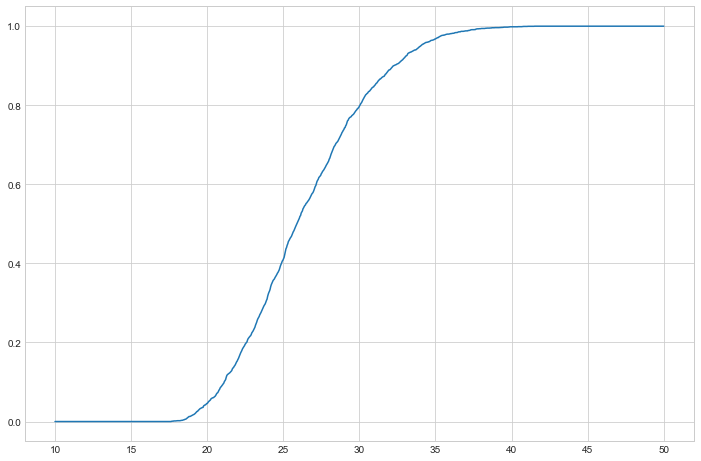

In [4]:
plt.figure(figsize=(12, 8))

ox = np.linspace(10, 50, 1000)
oy = np.array([edf(df['age'], x) for x in ox])

plt.plot(ox, oy)

Всё же функция распределения не даёт представления о распределении, аналогичного тому, что даёт закон распределения дискретных случайных величин. Хотелось бы понять, какие значения случайной величины более «вероятно» наблюдать, чем другие. 

Для таких целей удобно использовать __функцию плотности__:
$$f(x) = F'(x)$$

Геометрический смысл функции плотности таков: вероятность того, что случайная величина $X$ будет лежать в отрезке $(a, b)$, равна площади под графиком функции плотности $f(x)$ в пределах от $a$ до $b$.

Общая площадь под графиком функции $f(x)$ равна $1$, аналогично тому, что сумма вероятностей значений дискретной случайной величины равна $1$.

Однако, стоит помнить, что _значение $f(x)$ не является вероятностью $P(X = x)$_. Оно лишь отражает _плотность_ случайной величины в окрестности точки $x$.

Плотность распределения можно визуализировать с помощью гистограммы, передав в неё значение параметра `density=True`.

__Пример 2__

Построим гистограмму значений возраста хоккеистов, чтобы примерно представить, как выглядит соответствующая функция плотности распределения.

(array([0.01373957, 0.03778382, 0.06793454, 0.0822466 , 0.09674948,
        0.08148329, 0.07480433, 0.06297303, 0.04121871, 0.03072321,
        0.02060936, 0.01011385, 0.00496151, 0.00228993, 0.00095414]),
 array([17.64271047, 19.2335843 , 20.82445813, 22.41533196, 24.0062058 ,
        25.59707963, 27.18795346, 28.77882729, 30.36970112, 31.96057495,
        33.55144878, 35.14232261, 36.73319644, 38.32407027, 39.9149441 ,
        41.50581793]),
 <a list of 15 Patch objects>)

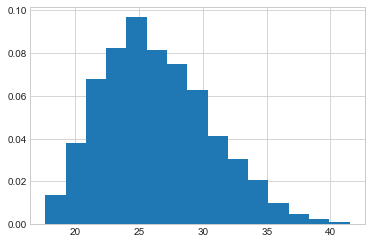

In [5]:
plt.hist(df['age'], density=True, bins=15)

Математическое ожидание и дисперсия для непрерывной случайной величины также считаются иначе, чем для дискретной. 

Формула для математического ожидания:

$$M(X) = \displaystyle\int_{-\infty}^\infty x \cdot f(x) \: dx$$

Формула для дисперсии:

$$D(X) = \displaystyle\int_{-\infty}^\infty (x - M(X))^2 \cdot f(x) \: dx$$

### Примеры непрерывных распределений

Непрерывная случайная величина $X$ имеет __равномерное распределение__ на отрезке $[a, b]$, если её плотность внутри этого отрезка постоянна, а вне этого отрезка равна 0. Другими словами:
$$
f(x) = \begin{cases}
\dfrac{1}{b - a}, & x \in [a, b], \\
0, & x \not\in [a, b].
\end{cases}
$$

Не путать с _дискретным равномерным_ распределением.

Математическое ожидание и дисперсия равномерного распределения:
$$M(X) = \dfrac{a + b}{2}, \:\: D(X) = \dfrac{(b - a)^2}{12}.$$

__Пример 3__

Выборку из равномерного распределения можно получить с помощью функции `uniform` из модуля `numpy.random`. Построим выборку из равномерного распределения с параметрами $a = -1.5$, $b = 2.5$.

In [6]:
a = -1.5
b = 2.5

samples = np.random.uniform(a, b, size=10000)

print(samples)

[-1.30525553 -1.04732558 -0.97936717 ...  1.74373965  1.74689599
  2.30158196]


Убедимся, что каждый элемент в этой выборке встречается лишь однажды:

In [7]:
len(samples) - len(set(samples))

0

Математическое ожидание:
$$M(X) = \dfrac{a + b}{2} = \dfrac{-1.5 + 2.5}{2} = \dfrac{1}{2}.$$

Выборочное среднее:

In [8]:
samples.mean()

0.4912491320981657

Дисперсия:
$$D(X) = \dfrac{(b - a)^2}{12} = \dfrac{4^2}{12} = \dfrac{4}{3} \approx 1.333.$$

Выборочная дисперсия (несмещённая) от выборки:

In [9]:
samples.var(ddof=1)

1.3119016687437037

__Пример 4__

Построим эмпирическую функцию распределения.

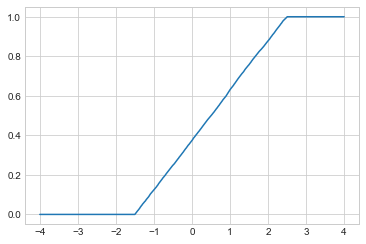

In [10]:
ox = np.linspace(-4, 4, 1000)
oy = np.array([edf(samples=samples, x=x) for x in ox])

plt.plot(ox, oy)

Построим гистограмму, чтобы визуализировать функцию плотности. Вместе с ней построим теоретическую функцию плотности.

In [11]:
def pdf_uniform(a: float, b: float, x: float) -> float:
    """Функция плотности (probability density 
    function) равномерного распределения.
    """
    
    return 1 / (b - a) if a <= x <= b else 0

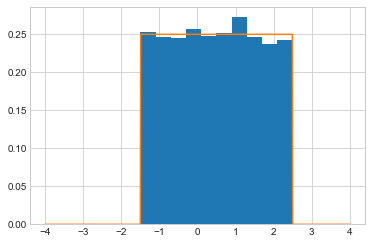

In [12]:
oy = np.array([pdf_uniform(a, b, x) for x in ox])

plt.hist(samples, density=True)
plt.plot(ox, oy)

Непрерывная случайная величина $X$ имеет __нормальное распределение__ с параметрами $a$ и $\sigma > 0$, если её плотность распределения задаётся формулой
$$f(x) = \dfrac{1}{\sqrt{2 \pi \sigma^2}} e^{- \frac{(x - a)^2}{2 \sigma^2}}$$

Нормальное распределение с параметрами $a = 0$ и $\sigma = 1$ называется __стандартным нормальным распределением__.

Параметры $a$ и $\sigma$ задают, соответственно, математическое ожидание и среднее квадратическое отклонение случайной величины:
$$M(X) = a, \:\: D(X) = \sigma^2$$

Нормальное распределение является одним из наиболее распространённых на практике. Например, нормально распределены:

* рост, вес людей
* показатели IQ
* время прихода на работу
* скорость движения молекул в жидкостях и газах

Как правило, нормально распределёнными являются случайные величины, описывающие события, которые зависят от большого числа слабо связанных случайных факторов.

__Пример 5__

Выборку из нормального распределения можно получить с помощью функции `normal` из модуля `numpy.random`. Построим такую выборку с параметрами $a = 8$, $\sigma = 2$.

In [13]:
loc = 8
scale = 2

In [14]:
samples = np.random.normal(loc, scale, size=10000)

print(samples)

[ 6.83496579  7.01662531  6.68474264 ...  4.92865301 10.4857214
  7.55144756]


Выборочные мат. ожидание и дисперсия:

In [15]:
samples.mean(), samples.var(ddof=1)

(7.977827552527752, 3.998408004813633)

__Пример 6__

Эмпирическая функция распределения:

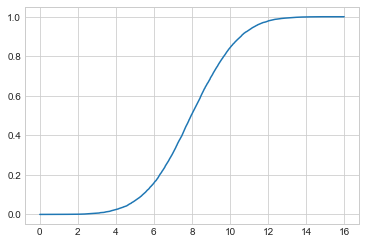

In [16]:
ox = np.linspace(0, 16, 1000)
oy = np.array([edf(samples, x) for x in ox])

plt.plot(ox, oy)

Гистограмма выборки и теоретическая функция плотности:

In [17]:
def pdf_normal(loc: float, scale: float, x: float) -> float:
    """Функция плотности нормального распределения.
    """
    
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

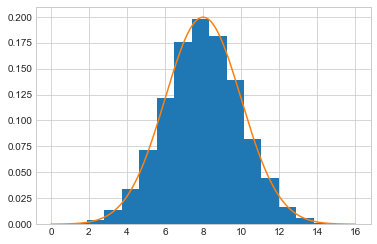

In [18]:
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=15)
plt.plot(ox, oy)

Кстати, в модуле `scipy.stats` есть готовые функции распределения и плотности для многих известных распределений (об этом ниже).

Для вычисления разброса значений нормально распределённой случайной величины можно использовать следующие правила:

* Интервал от $a - \sigma$ до $a + \sigma$ (__стандартное отклонение__)содержит около $68\%$ вероятностной массы (т.е. с вероятностью $68\%$ данная величина попадает в этот интервал).
* От $a - 2\sigma$ до $a + 2\sigma$ — около $95\%$ массы (__правило двух сигм__).
* От $a - 3\sigma$ до $a + 3\sigma$ — около $99.7\%$ массы (__правило трёх сигм__).

Посчитаем точные значения для этих интервалов. Для этого воспользуемся функцией `norm.cdf` из модуля `scipy.stats`. Эта функция вычисляет значения функции стандартного нормального распределения.

Стандартное отклонение:

In [19]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.6826894921370859

Правило двух сигм:

In [20]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.9544997361036416

Правило трёх сигм:

In [21]:
stats.norm.cdf(3) - stats.norm.cdf(-3)

0.9973002039367398

__Пример 7__

Вернёмся к данным о хоккеистах и рассмотрим столбец с ростом. Построим его гистограмму.

(array([  5.,   2.,  15.,  41.,  56., 150., 284., 407., 380., 480., 459.,
        412., 231., 184., 105.,  45.,  12.,  12.,   8.,   6.]),
 array([165., 167., 169., 171., 173., 175., 177., 179., 181., 183., 185.,
        187., 189., 191., 193., 195., 197., 199., 201., 203., 205.]),
 <a list of 20 Patch objects>)

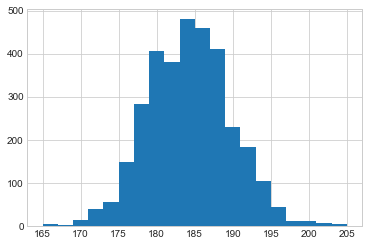

In [22]:
plt.hist(df['height'], bins=20)

Мы знаем, что рост — одна из величин, которая может распределяться нормально. Восстановим по выборке значения $a$ и $\sigma$ и построим поверх гистограммы теоретическую функцию плотности соответствующего нормального распределения.

In [23]:
loc = df['height'].mean()
scale = df['height'].std(ddof=1)

loc, scale

(183.829386763813, 5.467628706191652)

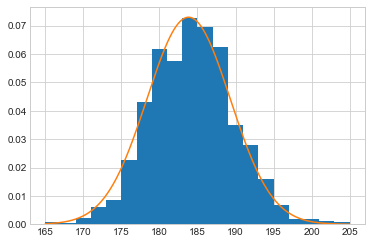

In [24]:
ox = np.linspace(165, 205, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(df['height'], density=True, bins=20)
plt.plot(ox, oy)

Проверим на этих данных правило двух сигм. В отрезке `(loc - 2 * scale, loc + 2 * scale)` должно содержаться $95\%$ значений.

In [25]:
two_sigmas_condition = (df['height'] > loc - 2 * scale) & (df['height'] < loc + 2 * scale)

df[two_sigmas_condition].shape[0] / df.shape[0]

0.9556769884638737

__Другие непрерывные распределения__

* __Экспоненциальное__ (или __показательное__): время между последовательными свершениями одного и того же события. Является непрерывным аналогом геометрического распределения. Функция плотности:

$$
F(x) = \begin{cases}
1 - e^{- \lambda x}, & x \geq 0, \\
0, & x < 0.
\end{cases}
$$

### `scipy.stats`

В модуле `scipy.stats` содержатся реализации основных функций для различных распределений:

* `binom` — биномиальное,
* `poisson` — Пуассоновское,
* `norm` — нормальное,
* `uniform` — непрерывное равномерное,
* `t` — распределение Стьюдента (о нём позже)

и др. 

Доступные функции:

* `pmf` — закон распределения для дискретных величин,
* `pdf` — функция плотности для непрерывных величин,
* `cdf` — функция распределения,
* `ppf` — квантильная функция (обратная к функции распределения)

и др. Например, с помощью этого модуля можно получить значения функции нормального распределения, которая не вычисляется аналитически и доступна лишь численно.

In [26]:
norm = stats.norm(loc=8, scale=2)

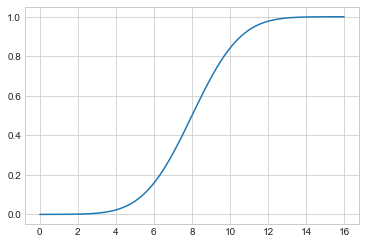

In [27]:
ox = np.linspace(0, 16, 1000)
oy = np.array([norm.cdf(x) for x in ox])

plt.plot(ox, oy)

А с помощью функции `ppf` получим значение третьего квартиля:

In [28]:
norm.ppf(0.75)

9.348979500392163

Проверка:

In [29]:
norm.cdf(9.348979500392163)

0.75

### Центральная предельная теорема

Одно из практически уникальных свойств нормального распределения — __устойчивость__ — означает, что если $X$ и $Y$ — _независимые нормально распределённые_ случайные величины, то их комбинация $Z = a \cdot X + b \cdot Y$ ($a$, $b$ — числа) также имеет нормальное распределение. Более того, для распределения $Z$ верны следующие равенства. Математическое ожидание:
$$M(Z) = a \cdot M(X) + b \cdot M(Y)$$
Дисперсия:
$$D(Z) = |a| \cdot D(X) + |b| \cdot D(Y)$$

Оказывается, что если и не в точности такое же, но подобное поведение можно наблюдать и в произвольном случае. Это хорошо иллюстрирует центральная предельная теорема.

Рассмотрим выборку из $n$ значений случайной величины $X$, имеющей произвольное распределение, и пусть $Y$ — случайная величина, равная сумме этих значений. 

__Центральная предельная теорема__ утверждает: чем больше $n$, тем _ближе_ распределение величины $Y$ к нормальному распределению с параметрами
$$a = n \cdot M(X), \:\: \sigma^2 = n \cdot D(X)$$


_Другая версия_ этой теоремы: пусть $Z$ — случайная величина, равная среднему арифметическому значений из выборки. Тогда с увеличением $n$ распределение этой величины становится всё ближе к нормальному распределению с параметрами
$$a = M(X), \:\: \sigma^2 = \dfrac{D(X)}{n}$$

Центральная предельная теорема согласуется со сделанным ранее наблюдением, что, как правило, случайные величины, описывающие события, которые зависят от большого числа слабо связанных случайных факторов, являются нормально распределёнными.

Отметим, что центральная предельная теорема работает не только для непрерывных случайных величин, но и для дискретных.

__Пример 8__

Проверим утверждение центральной предельной теоремы на равномерном распределении $X$ с параметрами $a = -1.5$,
$b = 2.5$. Для этого при различных $n$ сформируем $n$ выборок размера, например, $10^4$, а затем посчитаем от них поэлементно среднее. Таким образом, мы получим одну выборку размера $10^4$. Теорема утверждает, что чем больше $n$, тем больше эта выборка похожа на выборку из некоторого нормального распределения $Y$.

Математическое ожидание величины $X$ равно $\dfrac{a + b}{2} = \dfrac{1}{2}$. Дисперсия: 
$\dfrac{(b - a)^2}{12} = \dfrac{4^2}{12} = \dfrac{4}{3}$. Это означает, что нормальное распределение $Y$ имеет параметры $a = \dfrac{1}{2}$, $\sigma^2 = \dfrac{4}{3n}$.

In [30]:
a = -1.5
b = 2.5

m = (a + b) / 2
d = ((b - a) ** 2) / 12

n_samples = 10 ** 4

In [31]:
def get_mean_samples_uniform(n: int) -> np.ndarray:
    """Возвращает выборку из значений среднего от `n` равномерно распределённых
    случайных величин.
    """
    
    samples = np.random.uniform(a, b, size=(n, n_samples))
    
    return samples.mean(axis=0)

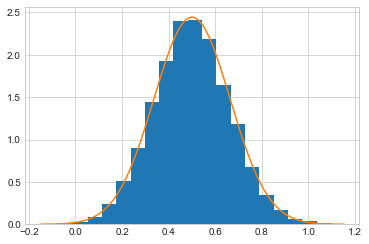

In [32]:
n = 50

loc = m
scale = np.sqrt(d / n)

samples = get_mean_samples_uniform(n)

ox = np.linspace(loc - 4 * scale, loc + 4 * scale, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy)

__Пример 9__

Аналогично продемонстрируем центральную предельную теорему на примере дискретного распределения, а именно биномиального с параметрами $n = 30$, $p = 0.2$. Параметр $n$ обозначим переменной `n_`, чтобы не конфликтовать с переменной `n`, отвечающей за число случайных величин, от которых берётся среднее.

Математическое ожидание в данном случае равно $np = 6$, дисперсия: $np(1 - p) = 4.8$.

In [33]:
30 * 0.2 * 0.8

4.800000000000001

In [34]:
n_ = 30
p = 0.2

m = n_ * p
d = n_ * p * (1 - p)

n_samples = 10 ** 4

In [35]:
def get_mean_samples_binomial(n: int) -> np.ndarray:
    """Возвращает выборку из значений среднего от `n` биномиально распределённых
    случайных величин.
    """

    samples = np.random.binomial(n_, p, size=(n, n_samples))
    
    return samples.mean(axis=0)

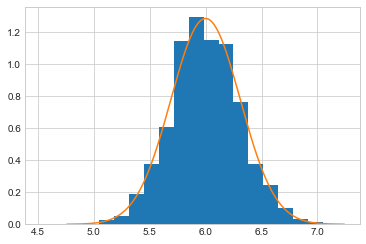

In [36]:
n = 50

loc = m
scale = np.sqrt(d / n)

samples = get_mean_samples_binomial(n)

ox = np.linspace(loc - 4 * scale, loc + 4 * scale, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy)

### Упражнения

__Задача 1__

О непрерывной равномерно распределённой случайной величине `B` известно, что её дисперсия равна 0.2. Можно ли найти правую границу величины `B` и её среднее значение зная, что левая граница равна 0.5? Если да, найдите их.

__Задача 2__

На сколько сигм (средних квадратических отклонений) отклоняется рост человека, равный 190 см, от математического ожидания роста в популяции, в которой `M(X) = 178` и `D(X) = 25`?

__Задача 3__

Рост взрослого населения города `X` имеет нормальное распределение, причём, средний рост равен 174 см, а среднее квадратическое отклонение равно 8 см. С помощью правил стандартного отклонения, двух и трёх сигм посчитайте, какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:

1. больше 182 см?
2. больше 190 см?
3. от 166 см до 190 см?
4. от 166 см до 182 см?
5. от 158 см до 190 см?
6. не выше 150 см или не ниже 190 см?
7. не выше 150 см или не ниже 198 см?
8. ниже 166 см?

__Задача 4__ (на подумать)

Каким образом связаны между собой понятие квантиля и правила двух и трёх сигм? 

Данное задание - на подумать, оформлять его не обязательно. Этот вопрос мы обсудим в начале следующего занятия.